In [68]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

from scipy import stats
from loess.loess_1d import loess_1d

# Introduction and Descriptive Statistics

## Data aquisition

- **Population:** The population is the set of all units for which an assertion has to made
- **Sample:** A sample is choosen out of the population (random)
- **Stat. unit:** Individual elements are called statistical units
- **Feature:** Each stat. unit has features
- **Feature value:** The value of the feature

## Data classes

|Type|Subtype|Remarks|
|:---|:---|:---|
|Qualitative|Nominal|Categories that cannot be ordered|
|Qualitative|Ordinal|Can be ordered naturally|
|Quantitative|Interval|In addition to ordinal values, differences can be computed|
|Quantitative|Ratio|Has a meaningful zero value|

## Frequency of qualitative features

Since a meaningful mean or other statistical values cannot be computed from qualitative features, it can only be described by frequencies

$$
absolute \space frequency \Rightarrow h_j\\
relative \space frequency \Rightarrow f_j = \frac{h_j}{N}
$$

## Categorical values

In [2]:
for i in [i for i in pd.Categorical.__doc__.split('\n')][:43]:
    print(i)


    Represent a categorical variable in classic R / S-plus fashion.

    `Categoricals` can only take on only a limited, and usually fixed, number
    of possible values (`categories`). In contrast to statistical categorical
    variables, a `Categorical` might have an order, but numerical operations
    (additions, divisions, ...) are not possible.

    All values of the `Categorical` are either in `categories` or `np.nan`.
    Assigning values outside of `categories` will raise a `ValueError`. Order
    is defined by the order of the `categories`, not lexical order of the
    values.

    Parameters
    ----------
    values : list-like
        The values of the categorical. If categories are given, values not in
        categories will be replaced with NaN.
    categories : Index-like (unique), optional
        The unique categories for this categorical. If not given, the
        categories are assumed to be the unique values of `values` (sorted, if
        possible, otherwise in t

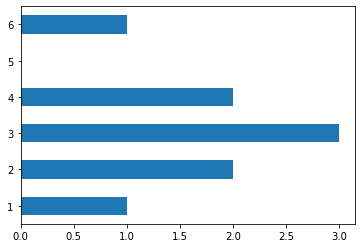

In [3]:
c = pd.Categorical([1, 2, 3, 6, 4, 3, 2, 3, 4], [1, 2, 3, 4, 5, 6])
pd.Series(c).value_counts(sort=False).plot.barh();

## Frequency of quantitative features

- Rarely two identical values are observed
- Absolute/relative frequencies for single observations are thus not meaningful
- Can be described by relative frequency aka. density

$$
f_j = \frac{\# \{values \space in \space l_j\}}{(b_j-a_j)*N}
$$

where $l_j = [a_j, b_j)$ is the j-th **bin** and $b_j > a_j$.

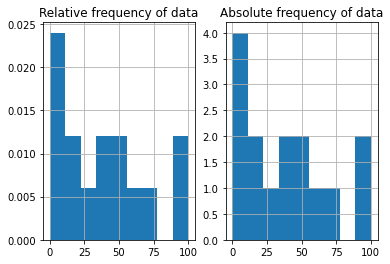

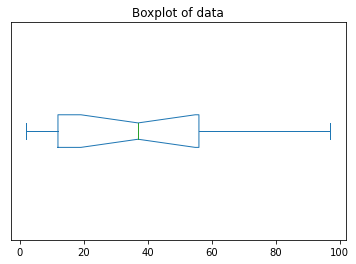

In [4]:
# Example:

random.seed(4)
values = pd.Series([random.randint(0, 100) for _ in range(15)])
bins = np.linspace(0, 100, 10)

fig, ax = plt.subplots(1, 2)
values.hist(bins=bins, density=True, ax=ax[0])
values.hist(bins=bins, density=False, ax=ax[1])
ax[0].set_title("Relative frequency of data")
ax[1].set_title("Absolute frequency of data")
plt.show()

values.plot.box(notch=True, vert=False)
plt.title("Boxplot of data")
plt.yticks(ticks=[])
plt.show()

## Central tendency

- Measures describe the location of a sample on the feature scale
- They summarize the sample in a single number
- Often they are referred to as location measures

### Nominal data: Mode

> Most frequent value in a given sample with qualitative-nominal values is called mode. If there are two (or more) values with the same frequency, the sample is called bimodel (multimodal)

### Ordinal data: Quantiles

> Describes that the smallest value $q_{\alpha}$ in the sample for which at least $\alpha * 100%$ of the measurement values are not larger than $q_{\alpha}$

**Median & Co.**

- 50%-quantile is called median (Divides the sample in two equally sized portions)
- 25%-quantile and the 75%-quantile are called lower and upper quartile
- The smallest and largest values in the sample together with the median, $q_{0.25}$ and $q_{0.75}$ form the 5-number-summary of the sample

### Quantiative data: mean

> The mean is a location measure

1. Arithmetic mean (data with interval scale):
$$
    \bar{x} = \frac{1}{N} \sum_{i=1}^{N}x_i
$$

2. Geometric mean (data with ratio scale):
$$
    \bar{x_g} = \sqrt[n]{\prod_{i=1}^{N}x_i}
$$

![Introduction Measurements](./images/Introduction_overview_measurements.png)

### Dispersion measures

> Statistical dispersion accounts for variability of quantitative data (width of the distribution)

- range: $R = max(x_i) - min(x_i)$
- interquartile range (IQR): $IQR = q_{0.75} - q_{0.25}$
- empirical variance: $$s^2 = \frac{1}{N - 1} \sum_{i=1}^{N}(x_i - \bar{x})^2$$
- empirical standard deviation: $s = \sqrt{s^2}$

### Covariance

> The covariance is a measure for the linear dependency of two features X and Y

$$
s_{xy} = \frac{1}{N - 1} \sum_{i = 1}^{N}(x_i - \bar{x})(y_i - \bar{y})
$$

### Dependency and Correlation

> The correlation measures the linear dependency of features. If the data is independent, then the correlation is small. If the correlation is small, then little is known about the dependency of features

# A Gentle Introduction to Probability

## Random variables

> A random variable $X$ is a real-valued function on the sample space $\mathsf{\Omega}$, i. e. a rule $f : \mathsf{\Omega} \rightarrow W_X$ that assigns a number to each possible outcome.

- The outcomes of an experiment are stored in a list.
- The set of all possible outcomes is called sample space $\mathsf{\Omega}$
- A **random variable** $X$ is a real-valued function of the sample space $\mathsf{\Omega}$

## Probability

Let $X$ be the number of a certain event in $i$ observations with $n$ possible different outcomes. $X = 0$ means that this event has never occured. The probability of the result $X = 0 : P(X = 0) = \frac{1}{n}$

- Probability mass function: The sum over all probabilities is always 1
- The concept of probability mass functions only works for discrete random variables

## Common models

- An experiment with only two possible outcomes ($\mathsf{\Omega} = \{+, -\}$) is called Bernoulli trial
$$
P(S_n = k) = {n \choose k} * p^k * (1 - p) ^{n-k}, \quad for \space 0 \le k \le n
$$

In [5]:
# Example: 70% of people buy chicken sandwiches and 30% buy other products. What is the probability that 2 of 3 customers buy a chicken sandwich?
p_chicken = .7
n = 3
k = 2

model = stats.binom(n=n, p=p_chicken)
model.pmf(k)  # probability mass function

0.4409999999999998

**Expected value**

$$
E(X) = n * p
$$

or

```python
model = stats.binom(n=n, p=p)
model.mean()
```

## Distribution function

- Let $x \in \mathbb{R}$, Then, the event $X \le x$ is defined and we call $F(x) = P(X \le x)$ the (cummulative) distribution function (cdf) of $X$.

> The cumulative distribution function (cdf) is the probability, that a random variable values less or equal to x

## Probability density

- The probability density function (pdf) $f(x)$ is defined as $f(x) = F'(x)$, if the derivative exists

> The probability density function (pdf) is the probability, that a random variable values exactly at x

## Characteristics

**Expected value and variance**

- The expected value is the average value for a random variable when the number of trials approaches infinity
- The expected value of X is defined as $$E(X) = \mu x = \int_{-\inf}^{\inf}x*f(x)dx$$
- The expected variance of X is defined as $$Var(X) = \mathsf{\sigma}_x^2 = E[(X - \mu x) ^2] = \int_{-\inf}^{\inf}(x-\mu x) ^2 * f(x) dx = E(X^2) - E(X)^2$$

**Quantile**

- The $\alpha$-quantile $q(\alpha)$ of $X$ is defined as $$P(X \le q(\alpha)) = \alpha \Leftrightarrow F(q(\alpha)) = \alpha \Leftrightarrow q(\alpha) = F^{-1}(\alpha)$$

## When to use which probability function?

- **PMF** (Probability mass function): Used when dealing with discrete variables $\rightarrow$ The proability of each discrete outcome
- **PDF** (Probability density function): Used when dealing with continuous variables $\rightarrow$ The probabiliy of each discrete outcome
- **CDF** (Cumulative density function): Used with both, PMF and PDF when we want the probability that a variable values less or equal x

## Uniform distribution

> A uniform distribution has a constant density in the interval $[a, b]$

- Density function
$$
f(x)= 
\begin{cases}
    \frac{1}{b - a},& \text{if } a \leq x \leq b \\
    0,              & \text{otherwise}
\end{cases}
$$
- Distribution function

$$
F(x) = 
\begin{cases}
    0,& \text{if } x < a \\
    \frac{x - a}{b - a},& \text{if } a \leq x < b \\
    1,& \text{if } x \geq b
\end{cases}
$$

- Expected value

$$
E(X) = \frac{b + a}{2}
$$

- Expected variance

$$
Var(X) = \frac{(b - a)^2}{12}
$$

In [6]:
model = stats.uniform(0, 20)  # Every 20 minutes, a train arives
1 - model.cdf(4)  # Probability for waiting longer than 4 minutes when ariving at a random time

0.8

## Exponential distribution
 
> Exponential distribution is the model class for survival times

$$
X \sim Exp(\lambda), \quad \lambda > 0
$$

- Density function

$$
f(x) =
\begin{cases}
    \lambda e^{-\lambda * x},& \text{if } x \geq 0 \\
    0,& \text{else}
\end{cases}
$$

- Distribution function

$$
F(x) =
\begin{cases}
    0,& \text{if } x < 0 \\
    1 - e ^{-\lambda * x},& \text{if } 0 \leq x
\end{cases}
$$

- Expected value
$$
E(X) = \frac{1}{\lambda}
$$

- Expected variance
$$
Var(X) = \frac{1}{\lambda ^2}
$$

In [7]:
time_between_attacks = 2.3  # Expected value 2.3 seconds between two attacks -> Lambda = 1 / E(X)
model = stats.expon(scale=time_between_attacks)
model.cdf(1)  # Attach within in the next second

0.352594607916089

## Normal distribution

- Density function

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} exp \Biggl\{ - \frac{1}{2} \Bigl(\frac{x - \mu}{\sigma}\Bigr)^2 \Biggl\}
$$

- Distribution function
$$
F(x) = \int_{-\inf}^{x} f(u) du
$$

- Expecred value
$$
E(X) = \mu
$$

- Expected variance
$$
Var(X) = \sigma ^2
$$

In [8]:
model = stats.norm(325, 0.4)  # Example for screw production with avg length of 325mm and std of 0.4mm
p = model.cdf(324) + 1 - model.cdf(326)  # Probability for deviating more than 1mm from the nominal size
print(p)

0.012419330651552318


## Standard Error

$$
SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x - \bar{x}^2)}
$$

## Estimators and Confidence Intervals

## Unbiasedness

An estimator $\hat{\theta}$ is called unbiased if $E(\hat{\theta}) = \theta$  

The difference $Bias(\theta, \hat{\theta}) = \theta - E(\hat{\theta})$ the bias of the estimator. This is the systematic error we are making when estimating $\theta$

## Consistency

An estimator $\hat{\theta}$ for the parameter $\theta$ is called consistent, if the variance of $\hat{\theta}$ vanishes with increasing number of samples, i. e.
$$
\lim_{n \rightarrow \inf} Var(\hat{\theta}) = 0
$$

## Convergence

The mean squared error (MSE) can be decomposed in 
$$
MSE = E \bigl[ (\theta - \hat{\theta})^2 \bigr] = Bias(\theta, \hat{\theta})^2 + Var(\hat{\theta})
$$

### Convergent estimator

Let $\hat{\theta}$ be an estimator for a parameter $\theta$ based on a sample $X_1, \dots, X_n$ of size $n$. If $\hat{\theta}$ is unbiased and consistent it is also convergent, i. e.
$$
\lim_{n \rightarrow \inf} E \bigl[ (\theta - \hat{\theta})^2 \bigr] = 0
$$

In [9]:
variance = 6.25  # known variance from the production line
std = math.sqrt(variance)  # known standard deviation from the production line
x = [70.1, 69.3, 71.4, 72.8, 66.1, 70.7, 69.9, 73.6, 72.1]  # Measured values from the production line

model = stats.norm(np.mean(x), std)
expected_value = model.expect()  # model.expect == np.mean(x)
probability = model.cdf(65)

print("Expected value:", round(expected_value, 3))
print("Probability:", round(probability, 3))

Expected value: 70.667
Probability: 0.012


## Interval estimator

Let $X_1, \dots, X_n$ be independent and identically distributed measurements and let $\theta$ be an unknown parameter of the underlying distribution. For a given $\alpha \in (0, 1)$ we assume we have two estimators $\hat{\theta}_L$ and $\hat{\theta}_U$ such that
$$
P(\hat{\theta}_L \leq \theta \leq \hat{\theta}_U) \geq 1 - \alpha
$$
then we call $[\hat{\theta}_L, \hat{\theta}_U]$ a confidence interval with significance level $1 - \alpha$

- The interval limits $\hat{\theta}_L$ and $\hat{\theta}_U$ are random variables, i. e. each new measurement gives a new confidence interval for the same fixed parameter $\theta$.
- If $\hat{\theta}_L = - \inf$ or $\hat{\theta}_U = \inf$ we call the confidence interval one-sided.
- Confidence intervals are sought for most parameters, but can often only be computed approximatively
- Exact formulas are only available for $\theta = \mu$ and $\theta = \sigma$ in the case of normally distributed variables and a handfull of selected other parameters

## Confidence interval for µ if σ is unknown

**Interval for $\mu$ if $\sigma$ is known:**

Let $X_1, \dots, X_n$ be independent measurements with $X_i \sim N(\mu, \sigma^2)$, where $\sigma^2$ is known and $\theta = \mu$ should be estimated from data. Then

$$
\hat{\theta}_L = \bar{X} - z_{1-\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}}
$$

$$
\hat{\theta}_U = \bar{X} + z_{1-\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}}
$$

- The confidence interval covers the true parameter $\theta$ in $(1 - \alpha) * 100%$ of the cases (measurement repititions).
- The length of the interval increases with small $\alpha$ and decreases for large $n$
$$
l(\alpha, n) = \hat{\theta}_U - \hat{\theta}_L = 2 * \sigma * \frac{z_{1 - \frac{\alpha}{2}}}{\sqrt{n}}
$$


**How to calculate z**
```python
from scipy.stats import norm

alpha = 0.05
z = norm().ppf(1 - alpha / 2)
```

In [10]:
x = [0.9438, 0.9613, 0.9769, 1.0416, 1.0254] 
x_mean = np.mean(x)

n = len(x)
alpha = 0.05
sigma = 0.02  # known

z = stats.norm().ppf(1 - alpha / 2)  # z ~ 1.959963984540054

lo = x_mean - z * sigma / math.sqrt(n)
up = x_mean + z * sigma / math.sqrt(n)

print(f"Confidence interval: [{lo}, {up}]")

Confidence interval: [0.9722695491884685, 1.0073304508115317]


## Student t-distribution

For normally distributed and independent measurements $X_1, \dots, X_n$ with expected value $\mu$ and standard deviation $\sigma$ the quantity
$$
T = \frac{\bar{X} - \mu}{\frac{s_X}{\sqrt{n}}}
$$
is Student t-distributed with n - 1 degrees of freedom (dof).

## Interval for µ if σ is unknown

Let $X_1, \dots, X_n$ be independent measurements with $X_i \sim N(\mu, \sigma^2)$, where $\sigma^2$ is unknown and $\theta = \mu$ has to be estimated from data. Then

$$
\hat{\theta}_L = \bar{X} - t_{1 - \frac{\alpha}{2}, n - 1} * \frac{s_X}{\sqrt{n}}
$$

$$
\hat{\theta}_U = \bar{X} + t_{1 - \frac{\alpha}{2}, n - 1} * \frac{s_X}{\sqrt{n}}
$$

define a two-sided confidence interval with level $1 - \alpha$. Here $t_{1 - \frac{\alpha}{2}, n - 1}$ denotes the $(1 - \frac{\alpha}{2}$-quantile of the student-t distribution with $n - 1$ dof.

In [11]:
x = [0.9438, 0.9613, 0.9769, 1.0416, 1.0254] 
x_mean = np.mean(x)

n = len(x)
alpha = 0.05
sigma = np.std(x, ddof=1)

t = stats.t(n - 1).ppf(1 - alpha / 2)  # t ~ 2.7764451051977987

lo = x_mean - t * sigma / math.sqrt(n)
up = x_mean + t * sigma / math.sqrt(n)

print(f"Confidence interval: [{lo}, {up}]")

Confidence interval: [0.937689816092454, 1.0419101839075462]


## Distribution of the emp. variance

Assume that the filling volumne $X$ is normally distributed with expected value $\mu$ (unknown) and standard deviation $\sigma$ (unknown). We estimate the unknown variance $\sigma^2$ with

$$
s_x^2 = \frac{1}{n - 1} \sum_{i = 1}^{n}(X_i - \bar{X})^2
$$

Then the quantity

$$
Q = \frac{(n - 1) s_x^2}{\sigma^2} = \frac{\sum_{i = 1}^n(X_i - \bar{X})^2}{\sigma^2}
$$

has a known distribution. One calls it the Chi-squared ($\chi^2$) distribution with $n - 1$ dof.

## Confidence interval for σ

Let $X_1, \dots, X_n$ be independent measurements with $X_i \sim N(\mu, \sigma^2)$, where $\theta = \sigma$ should be estimated from data. Then

$$
\hat{\theta}_L = \frac{(n - 1) s_x^2}{q_{1 - \frac{\alpha}{2}}} \quad \text{ and } \quad \hat{\theta}_U = \frac{(n - 1) s_x^2}{q_{\frac{\alpha}{2}}}
$$

define a two-sided confidence interval with level $1 - \alpha$. Here $q_\beta$ is the $\beta$-quantile of the $\chi^2$-distribution with $n - 1$ dof.

In [12]:
x = [0.9438, 0.9613, 0.9769, 1.0416, 1.0254] 

alpha = 0.05
n = len(x)

q1 = stats.chi2(n - 1).ppf(alpha / 2)
q2 = stats.chi2(n - 1).ppf(1 - alpha / 2)

variance = np.var(x, ddof=1)

lo = (n - 1) * variance / q2
up = (n - 1) * variance / q1

print(f"Confidence interval: [{lo}, {up}]")

Confidence interval: [0.0006322425454810734, 0.014543745066977658]


# One-Sample Tests

## Step 1

**Hypothesis**  

- For the null-Hypothesis we belief, that the average value $\mu$ is equal to $\mu_0$
- The counter-claim is, that in reality $\mu > \mu_0$ or $\mu < \mu_0$

Formally:

$$
H_0 : \mu = \mu_0 \text{ (Null-Hypothesis)}
$$
against
$$
H_1 : \mu > \mu_0 \text{ (Alternative-Hypothesis)}
$$

## Step 2

In order to check the null hypothesis, we need a test statistic T that satisfies two conditions:

1. T can be computed from measurements $X_1, \dots, X_n$
2. The distribution of T under the null hypothesis $H_0$ is known.

A meaningful test statistic additionally should be related to the unknown parameter $\mu$. In our example we choose e. g. $$T = \bar{X}$$
Given $H_0$ we know that T is normally distributed $N(\mu_0, \sigma^2/n)$

## Step 3

If the null hypothesis is indeed right then for a measurement $X_1, \dots, X_n$ of n values the statistic

$$
T = \bar{X} = \frac{1}{n}(X_1 + \dots + X_n)
$$

sould be too far away from $\mu_0$. If so, the alternative hypothesis could be more likely.

If $H_0$ is corrent, then $T \sim N(\mu_0, \sigma^2/n)$. For a predefined $\alpha \in (0, 1)$ we choose the $1 - \alpha$-quantile $c$ of the distribution $T$. We reject the hypothesis, if the measured value of $T$ is in the rejection area $T\in C = [c, \inf]$

**How to compute c**

```python
from scipy.stats import norm

alpha = 0.05  # significance level
c = stats.norm().ppf(1 - alpha)  # right-sided
c = stats.norm().ppf(alpha)  # left-sided
```

## Step 4

If the measurement $t$ of $T$ is in the rejection area $C$, we reject the hypothesis $H_0$.

## z-Test

When we test for an unknown mean in a population, a slighty different (but equivalent) test statistic is usually used.
Let $X \sim N(\mu, \sigma^2)$, where $\mu$ is unknown and $\sigma$ is known. We test the null-hypothesis $$H_0 : \mu = \mu_0$$

against one of the alternatives
$$
H_1 : \mu > \mu_0, \quad \text{ or } \quad H_1 : \mu \neq \mu_0, \quad \text{ or } \quad H_1 : \mu < \mu_0
$$

We use the test statistic

$$
T = \frac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
$$

Given the null-hypothesis $H_0 : \mu = \mu_0$ the statistic $T$ has a standard normal distribution $N(0, 1)$

In [13]:
mu0 = 1  # hypothesis: µ_0 = 1
sigma = 0.1  # Assumed to be known
n = 5  # Number of measurements

alpha = 0.05  # Significance level
c = stats.norm().ppf(1 - alpha)  # rejection area (right-sided)

values = np.array([0.9411, 1.0533, 1.1053, 1.1601, 1.2044])
x_mean = np.mean(values)

t = (x_mean - mu0) / (sigma / math.sqrt(n))
print(t > c)

True


## t-Test

Let $X \sim N(\mu, \sigma^2)$, where $\mu$ and $\sigma$ are unknown. We test the null-hypothesis $$H_0 : \mu = \mu_0$$
against one of the alternatives

$$
H_1 : \mu > \mu_0, \quad \text{ or } \quad H_1 : \mu \neq \mu_0, \quad \text{ or } \quad H_1 : \mu < \mu_0
$$

We use the test statistic

$$
T = \frac{\bar{X} - \mu_0}{\frac{s_x}{\sqrt{n}}}
$$

Given the null-hypothesis $H_0 : \mu = \mu_0$ the statistic $T$ has a student-t distribution with $n - 1$ dof.

In [14]:
mu0 = 1  # hypothesis: µ_0 = 1
n = 5  # Number of measurements

alpha = 0.05
c = stats.t(n - 1).ppf(1 - alpha)  # rejection area (right-sided)

values = np.array([0.9411, 1.0533, 1.1053, 1.1601, 1.2044])
x_mean = np.mean(values)

s = np.std(values, ddof=1)

t = (x_mean - mu0) / (s / math.sqrt(n))
print(t > c)

False


## t-Test with Bernoulli distribution

The observations $X_i$ are Bernoulli distributed and thus we have

- $\mu = E(X_i) = p$ and
- $\sigma^2 = Var(X_i) = p * (1 - p)$

The central limit theorem tells us that

$$
\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{\bar{X} - p}{\frac{\sqrt{p*(1 - p)}}{\sqrt{n}}} \sim N(0, 1)
$$

There are different guidelines in the literature concerning under what conditions the normal approximation is valid. A typical condition is $n > 30$, but if p is very small or large, this will very likely not be valid. Typically one additionally forces that $n * p > 5$ and $n * (1 - p) > 5$.

In [15]:
p0 = 0.15
alpha = 0.05

n = 734
k = 93

c = stats.norm().ppf(alpha)

x_bar = k / n
s_x = math.sqrt(p0 * (1 - p0))

t = (x_bar - p0) / (s_x / math.sqrt(n))
p_value = stats.norm().cdf(t)
p_value, t < c

(0.03856083668351129, True)

## Interpretation

It is important to distinguish two aspects in a statistical test:

1. The real situation: Either $H_0$ is true or $H_0$ is wrong
2. The decision: We accept $H_0$ (i. e. $T$ is not in the rejection area) or we reject $H_0$.

If $H_0$ is true in the real situation and we reject $H_0$ it is an error of $1^{st}$ kind.  

If $H_0$ is wrong in the real situation and we accept $H_0$ it is an error of the $2^{nd}$ kind.

## Error of first kind

The error of first kind can be controlled by $\alpha$. We call $\alpha$ the error probability or level of significance.

## Significance tests

In [16]:
values = np.array([0.9411, 1.0533, 1.1053, 1.1601, 1.2044])

mu0 = 1
alpha = 0.05  # significance level

res = stats.ttest_1samp(values, popmean=mu0, alternative='greater')
res

Ttest_1sampResult(statistic=2.032886862095466, pvalue=0.05592235210847076)

## Power function

Let $\theta$ be the parameter to be tested (e. g. $\mu$ or $p$). Then, the function

$$
g(\theta) = P(H_0 \text{ rejected}|\theta \text{ is the true parameter})
$$

is called the power function of the test

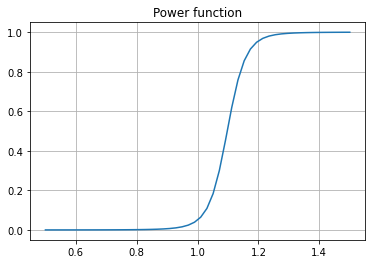

In [17]:
values = np.array([0.9411, 1.0533, 1.1053, 1.1601, 1.2044])

mu0 = 1
n = 5

alpha = 0.05
c = stats.t(n - 1).ppf(1 - alpha)
s = np.std(values, ddof=1)

theta = np.linspace(0.5, 1.5)
rhs = c + (mu0 - theta) / (s / math.sqrt(n))
p = 1 - stats.t(n - 1).cdf(rhs)

plt.plot(theta, p)
plt.title("Power function")
plt.grid()
plt.show()

In [18]:
x = [124, 145, 112, 124, 136, 129, 125, 131, 142, 114]
n = len(x)

mu0 = 120

alpha = 0.01
c = stats.t(n - 1).ppf(1 - alpha)

x_mean = np.mean(x)
s = np.std(x, ddof=1)

t = (x_mean - mu0) / (s / math.sqrt(n))
t > c

False

In [19]:
stats.ttest_1samp(x, mu0, alternative='greater')

Ttest_1sampResult(statistic=2.398887151654915, pvalue=0.01998537512533906)

In [20]:
x_mean = 6.2
n = 1438
std = 2.06
mu0 = 6

alpha = 0.01
c = stats.t(n - 1).ppf(1 - alpha)

t = (x_mean - mu0) / (std / math.sqrt(n))
print("H_1 is", t > c)

1 - stats.norm().cdf(t)

H_1 is True


0.00011586577729283398

# Two-Sample Tests and ANOVA

## 2-sample t-test for paired data

Let $(X_1, Y_1), \dots, (X_n, Y_n)$ be paired data such that the difference $D_i = X_i - Y_i$ satisfies the requirements of the 1-sample t-test. Let $\mu_X = E(X_i)$ and $\mu_Y = E(Y_i)$. Then, $\mu = E(D) = \mu_X - \mu_Y$. Therefore, testing

$$
H_0 : \mu_X = \mu_Y \quad \text{vs} \quad H_i : \mu_X \neq \mu_Y
$$

can be achieved by performing a 1-sample t-test for

$$
H_0 : \mu = 0 \quad \text{vs} \quad H_1 : \mu \neq 0
$$

In [32]:
x = np.array([264, 262, 257, 259, 261, 250, 261, 265, 261, 263])  # after diet
y = np.array([301, 272, 240, 321, 315, 291, 350, 299, 231, 244])  # before diet

d = x - y

res = stats.ttest_1samp(d, popmean=0, alternative='less')
res

Ttest_1sampResult(statistic=-2.113523921321693, pvalue=0.031852094614968074)

## Test for differences in two groups

**Hypothesis:**

We assume that $X$ and $Y$ are independent random variables with
$$
X \sim N(\mu_X, \sigma_X^2) \quad \text{and} \quad Y \sim N(\mu_Y, \sigma_Y^2)
$$
for a given $\Delta \in \mathbb{R}$
$$
H_0 : \mu_X - \mu_Y = \Delta
$$
against the alternative
$$
H_1 : \mu_X - \mu_Y \leq \Delta \quad \text{or} \quad H_1 : \mu_X - \mu_Y \neq \Delta \quad \text{or} \quad H_1 : \mu_X - \mu_Y \geq \Delta
$$

## 2-sample t-Test for equal variance

Let $X_1, \dots, X_n$ and $Y_1, \dots, Y_m$ be independent samples of $X$ and $Y$ with
$$
\sigma_X = \sigma_Y = \sigma
$$
Given $H_0$ is true, we find that the statistic
$$
T = \frac{\bar{X} - \bar{Y} - \Delta}{s_P * \sqrt{\frac{1}{n} + \frac{1}{m}}}
$$
follows a student-t distribution with $m + n - 2$ dof. Here
$$
s_P^2 = \frac{(n - 1)s_X^2 + (m - 1)s_Y^2}{n + m - 2}
$$
is the pooled variance

In [37]:
# Example
x = np.array([267.5, 264.8, 292.1, 279.3, 265.6, 253.3,
              290.4, 284.2, 298.0, 267.2, 281.9, 272.3])
y = np.array([293.1, 283.4, 253.1, 249.5, 240.6, 300.4,
              233.1, 215.8, 246.1, 264.4, 204.0, 270.3,
              233.0, 231.4, 275.5, 245.3, 281.2, 274.5, 266.0, 248.8])

delta = 20

x_mean = np.mean(x)
y_mean = np.mean(y)

x_var = np.var(x, ddof=1)
y_var = np.var(y, ddof=1)

n = x.shape[0]
m = y.shape[0]

sp = math.sqrt(((n - 1) * x_var + (m - 1) * y_var) / (n + m - 2))

t = (x_mean - y_mean - delta) / (sp * math.sqrt(1 / n + 1 / m))
print("t:", t)

p = 1 - stats.t(n + m - 2).cdf(t)
print("p:", p)

t: 0.11381708088861871
p: 0.4550705475644521


In [36]:
x = np.array([267.5, 264.8, 292.1, 279.3, 265.6, 253.3,
              290.4, 284.2, 298.0, 267.2, 281.9, 272.3])
y = np.array([293.1, 283.4, 253.1, 249.5, 240.6, 300.4,
              233.1, 215.8, 246.1, 264.4, 204.0, 270.3,
              233.0, 231.4, 275.5, 245.3, 281.2, 274.5, 266.0, 248.8])
delta = 20

stats.ttest_ind(x, y + delta, equal_var=True, alternative="greater")

Ttest_indResult(statistic=0.11381708088861511, pvalue=0.45507054756445353)

## Welch-Test

- If the variances of $X$ and $Y$ are different, then the pooled variance $s_P$ can not be computed
- The test statistic $T$ is computed similarly, but the distribution under $H_0$ is not known
- It is possible to approximate the distribution of $T$ by a t-distribution.
- In this case the test is called the Welch-Test

In [38]:
x = np.array([267.5, 264.8, 292.1, 279.3, 265.6, 253.3,
              290.4, 284.2, 298.0, 267.2, 281.9, 272.3])
y = np.array([293.1, 283.4, 253.1, 249.5, 240.6, 300.4,
              233.1, 215.8, 246.1, 264.4, 204.0, 270.3,
              233.0, 231.4, 275.5, 245.3, 281.2, 274.5, 266.0, 248.8])
delta = 20

stats.ttest_ind(x, y + delta, equal_var=False, alternative="greater")

Ttest_indResult(statistic=0.13183447138445503, pvalue=0.4480027476341023)

## Multiple tests

If multiple tests are done, each with a significance level of $\alpha = 5%$, the error probability of a $n$-fold t-test increases, i. e. even if no variable has an influence, it can be expected that one of the $n$ experiments show a spurious significant result.

$$
P(\text{Error of first kind for at least one test}) = 1 - P(\text{No error of first kind for all tests}) = 1 - (1 - \alpha)^n
$$

## Example Paper-bags

**Notions**

- The tensile strength $Y$ of the paper is called the dependent or response variable
- The concentration of hard wook $X$ is called the (controllable) factor variable (or treatment)
- The factor $X$ only has $k$ unique levels.
- For each factor level there are $n$ replicates of $Y$
- If these $N = k * n$ experiments are carried out in random order, we speak of a completely randomized design

## One-factor model

We define the following model for the dependent variable $Y$
$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

- The global mean $\mu$ is independent of the factor variable
- The $i$-th factor effect $\tau_i$ describes the influence of the factor level $i$ on the response variable
- The term $\epsilon_{ij}$ constitutes the random error. We shall assume that the errors are
    1. independent and normally distributed
    2. have mean 0 and
    3. that all errors have the same (unknown) variance $\sigma^2$

## Hypothesis test - One-factor model

For the one-factor model we test the hypothesis
$$
H_0 : \tau_1 = \tau_2 = \dots = \tau_k = 0
$$
vs.
$$
H_1: \text{ There is at least one } i \text{ such that } \tau_i \neq 0
$$

- All means are considered at once. There are no multiple tests
- If the test rejects $H_0$, we have to use post-hoc tests to find out which factor has an influence.

## Test statistic - One-factor model

The basic idea for constructing a test statistic is the variance decomposition. We compute the total sum of squares of the data (total variance).

$$
SS_T = \sum_{i=1}^k \sum_{j=1}^n (y_{ij} - \bar{y}_{..})^2
$$

The term can be decomposed as follows

$$
SS_T = \sum_{i=1}^k \sum_{j=1}^n ((\bar{y}_{i.} - \bar{y}_{..}) + (y_{ij} - \bar{y}_{i.}))^2 = n * \sum_{i=1}^k(\bar{y}_{i.} - \bar{y}_{..})^2 + \sum_{i=1}^k \sum_{j=1}^n (y_{ij} - \bar{y}_{i.})^2 = SS_{Treat} + SS_E
$$

## Interpretation

$$
n * \sum_{i=1}^k(\bar{y}_{i.} - \bar{y}_{..})^2 \quad \text{vs} \quad \sum_{i=1}^k \sum_{j=1}^n (y_{ij} - \bar{y}_{i.})^2
$$

- The term $SS_{Treat}$ measures the average differences of the response variable for each factor level compared with the total average
- The term $SS_E$ measures the random error of the model
- It is thus important to compare $SS_{Treat}$ and $SS_E$ appropriately
    $$
    SS_E = SS_T - SS_{Treat}
    $$
- Idea: if the factor has an influence on the response variable, then $SS_{Treat}$ is rather large and $SS_E$ is rather small

## ANOVA - Analysis of variance

In order to compare these quantities, we have to normalize them. We compute the average sum of squares

1. The quantity $SS_{Treat}$ has $k - 1$ dof. Thus
$$
MS_{Treat} = \frac{1}{k - 1} * SS_{Treat}
$$
2. The quantity $SS_E$ has $k * (n - 1)$ dof. Thus
$$
MS_{E} = \frac{1}{k(n - 1)} * SS_E
$$

The mean sum of squares constitute variances. Comparing these variances is called analysis of variance or ANOVA

**test statistics**

Given the hypothesis
$$
H_0 : \tau_1 = \tau_2 = \dots = \tau_k = 0
$$
the statistic
$$
F = \frac{MS_{Treat}}{MS_E}
$$
is Fisher-distributed (F-distributed) with $k - 1$ and $k(n - 1)$ dof. The rejection area is right-sided

In [40]:
y = np.array([
    [7, 8, 15, 11, 9, 10],
    [12, 17, 13, 18, 19, 15],
    [14, 18, 19, 17, 16, 18],
    [19, 25, 22, 23, 18, 20]
])

# perform anova
res = stats.f_oneway(y[0, :], y[1, :], y[2, :], y[3, :])
res

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

## ANOVA - Calculating the p-value

To calculate the p-value of the ANOVA, we use the f-statistics

```python
from scipy import stats

k = 3  # Number of factor levels
n = 10  # Number of replicates

F = ms_treat / ms_e

p_value = stats.f((k - 1), k * (n - 1)).cdf(F)
```

## Estimation of Effects

It is rather simple to estimate the treatment effects:

1. Estimator for the global mean $\mu$

$$
    \hat{\mu} = \frac{1}{k * n} \sum_{i=1}^k \sum_{j=1}^n y_{ij} \quad \text{ (means of all observations)}
$$

2. Estimators for the group means $\mu_i$

$$
\hat{\mu}_i = \frac{1}{n} \sum_{j=1}^n y_{ij} \quad \text{ (mean of group values)}
$$

3. Finally: Plug-in estimators for the treatments $\tau_i$

$$
\hat{\tau_i} = \hat{\mu}_i - \hat{\mu}
$$

In [41]:
y = np.array([
    [7, 8, 15, 11, 9, 10],
    [12, 17, 13, 18, 19, 15],
    [14, 18, 19, 17, 16, 18],
    [19, 25, 22, 23, 18, 20]
])

mu_hat = y.mean()  # overall mean
mu_group_hat = y.mean(axis=1)  # group means
tau = mu_group_hat - mu_hat

print("Estimated treatments:", tau)
print("Overall mean:", mu_hat)

Estimated treatments: [-5.95833333 -0.29166667  1.04166667  5.20833333]
Overall mean: 15.958333333333334


## Analysis of residuals

It is important to check after the ANOVA if the assumptions on the error term are satisfied. To this end we look at the residuals
$$
e_{ij} = y_{ij} - \hat{\mu} - \hat{\tau_i} = y_{ij} - y_{i.}
$$

The residuals $e_{ij}$ are estimators for the error terms $\epsilon_{ij}$ and we check the following properties:

1. the residuals have mean 0
2. the residuals grouped according to the factor level have equal variance $\sigma^2$ and
3. the residuals are approximately normally distributed

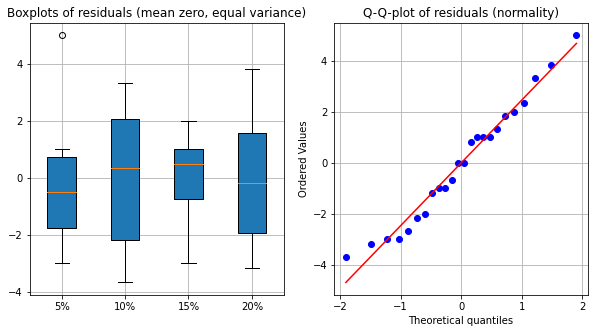

In [51]:
r = y.T - mu_group_hat  # residuals

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].boxplot(r, patch_artist=True, labels=['5%', '10%', '15%', '20%'])
ax[0].set_title('Boxplots of residuals (mean zero, equal variance)')
ax[0].grid()

stats.probplot(r.reshape(-1), plot=ax[1], dist=stats.distributions.norm)
ax[1].set_title('Q-Q-plot of residuals (normality)')
ax[1].grid()

plt.show()

## Outlook ANOVA

- It is possible (and common) to refine the null hypothesis. E. g. you could test $$\mu_1 = \mu_2$$ $$\mu_3 = \mu_4$$ $$\mu_1 + \mu_2 = \mu_3 + \mu_4$$ This combinations of means are called contrasts and one can test all equations simultaniously
- If the ANOVA is significant one usually conducts post-hoc tests in order to find those levels that have the biggest influence on the response. Typical tests:
    - Scheffé
    - Bonferroni
    - Tukey's HSD Test
    - ...

# Simple Linear Regression

## Regression Analysis

Regression analysis represents a statistical method to study and model the relationship between a response variable and predictor variables. Principal goal of regression analysis is to:

- predict data points based for some new values of the predictor variables (prediction)
- understand how the response variable is affected by a change of the predictor variables (inference)

Applications: Regression analysis is one of the major methods in data analysis and applied in many different fields

# Mathematical Formulation

**Required:** Function $f$, that predicts the sales $Y$ based on the three advertising budgets $X_1, X_2, X_3$:
$$
y \approx f(X_1, X_2, X_3)
$$

- $Y$: response variable or output variable
- $X_1, X_2, X_3$: Predictors or input variables

**Remark:** In relation $Y \approx f(X_1, X_2, X_3)$ there is no equal sign : since the plots do not represent graphs of a function. $f$ represents the relation between $X_1, X_2, X_3$ and $Y$ only approximately

## Statistical Regression Analysis

**Assumption:** There is a relationship between $Y$ and $X_1, X_2, X_3$ and deviations are random

**Mathematical Formulization:**

$$
Y = f(X_1, X_2, X_3) + \epsilon
$$

- $f$ is some fixed but unknown function of $X_1, X_2, \dots, X_p$
- $\epsilon$ is a random error term which is:
    - independent of $X_1, X_2, \dots, X_p$
    - has mean zero
    
**Remarks:**  

- Error $\epsilon$ is described in terms of a probability distribution
- Quantity $\epsilon$ may contain unmeasured or unmeasurable variables
- Simple assumption: $f$ is linear. Linear regression allows as well to fit non-linear curves.

## Simple Linear Regression Model

We assume that there is approximately a linear relationship between $X$ and $Y$:
$$
Y \approx \beta_0 + \beta_1 X
$$

- $\beta_0$ represents the intercept of the regression line
- $\beta_1$ represents the slope of the regression line
- $\approx$ reads as is approximately modeled as

## Least Squares Method

- Let $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ be the prediction for $Y$ based on the $i$th value of $X$.
- The $i$-th residual is defined as $r_i = y_i - \hat{y}_i$, i. e. the difference between the $i$-th observed response value and the $i$-th response value that is predicted by our linear model.
- The Least squares approach chooses $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize the residual sum of squares (RSS)
$$
RSS = r_1^2 + r_2^2 + \dots + r_n^2
$$
or equivalently
$$
RSS = (y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_1)^2 + \dots + (y_n - \hat{\beta}_0 - \hat{\beta}_1 x_n)^2
$$

$\rightarrow$ derivative with respect to $\hat{\beta}_0$, resp. to $\hat{\beta}_1$ and set expression equal to zero!

## Least Squares Coefficient Estimates

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

where

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \quad \text{and} \quad \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

## How much do coefficient estimates scatter?

- We assume that we know the true relationship between $X$ and $Y$: $f(X) = 2 + 3X$
- We simulate $X$ and $Y$ from the model $$Y = 2 + 3X + \epsilon$$ where $\epsilon$ is normally distributed with mean 0, thus $\epsilon \sim N(0, \sigma^2)$. We create 100 random values of $X$ and generate the corresponding values of $Y$
- Every simulation can be considered as a random experiment
- After every experiment, we estimate the coefficients $\beta_0$ and $\beta_1$ and plot the corresponding regression line

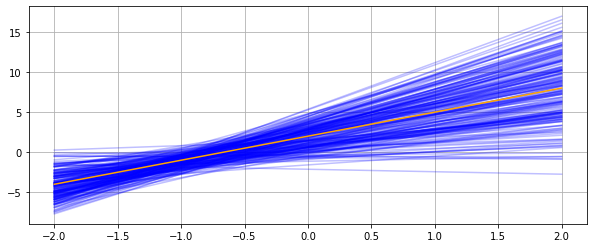

In [63]:
#generate random predictors (once)
random.seed(123)
x = stats.uniform(-2,2).rvs((100,))

# true parameters
beta0 = 2
beta1 = 3
sigma = 8

# number of experiments
N = 200
plt.figure(figsize = (10, 4))

for k in range(N):
    # generate the response
    eps = stats.norm(0, sigma).rvs((100,))
    y = beta0 + beta1*x + eps

    # estimate the coeffs
    a = np.sum((x - x.mean()) * (y - y.mean()) / np.sum((x - x.mean()) ** 2))
    b = y.mean() - a * x.mean()

    plt.plot((-2,2), (-2*a + b, 2*a + b), color = "blue", alpha = 0.25)

plt.plot((-2,2), (-2*beta1 + beta0, 2*beta1 + beta0), color = "orange")
plt.grid()
plt.show()

$\hat{\beta}_0$ and $\hat{\beta}_1$ are scattered around the true values $\beta_0$ and $\beta_1$ with standard error
$$
se(\hat{\beta}_0)^2 = \sigma^2(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2}) \quad \text{and} \quad se(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar{x})^2}
$$

where $\sigma^2=Var(\epsilon)$

## Residuals and Estimation of Variance

In general, $\sigma^2$ (variance of the error term) is not known: but can be estimated on the basis of data. The error term $\epsilon$  

- cannot be observed
- cannot be derived from $\epsilon = Y - (\beta_0 + \beta_1 X)$ since $\beta_0$ and $\beta_1$ are unknown.

Approximation for $\epsilon$: residuals $r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$

$$
\hat{\sigma} = RSE = \sqrt{\frac{RSS}{n - 2}} = \sqrt{\frac{r_1^2 + r_2^2 + \dots + r_n^2}{n - 2}}
$$

Factor $\frac{1}{n - 2}$ is chosen so that the estimate of $\sigma$ turns out to be unbiased. This estimate is known as the residual standard error (RSE)

True offset:  2  estimated offset:  2.2322927123364216
True slope:  3  estimated slope:  2.8019535241834315
True standard error:  5 RSE:  4.517566912582735


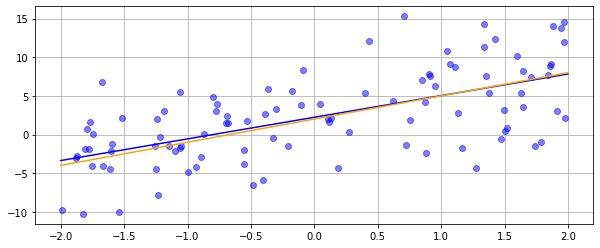

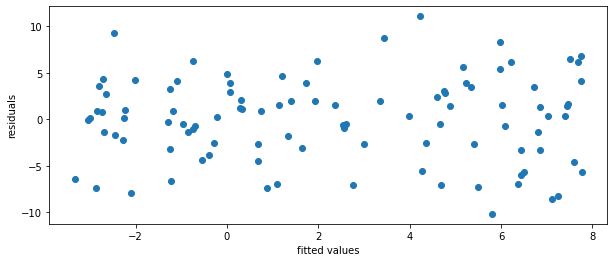

In [62]:
#generate random predictors (once)
seed(123)
xmin = -2
Deltax = 4
xmax = xmin + Deltax
x = uniform(xmin, Deltax).rvs((100,))
n = x.shape[0]

# true parameters
beta0 = 2
beta1 = 3
sigma = 5

# number of experiments
N = 200

# generate the response
eps = norm(0, sigma).rvs((100,))
y = beta0 + beta1 * x + eps

# estimate the coeffs
a = np.sum((x - x.mean()) * (y - y.mean()) / np.sum((x - x.mean()) ** 2))
b = y.mean() - a * x.mean()

#residuals
y_hat = a*x + b
r = y - y_hat

#estimate variance
RSE = np.sqrt(1/(n-2)*np.sum(r**2))

print("True offset: ", beta0, " estimated offset: ", b)
print("True slope: ", beta1, " estimated slope: ", a)
print("True standard error: ", sigma, "RSE: ", RSE)

plt.figure(figsize = (10, 4))
plt.plot(x, y, 'o', color = "blue", alpha=0.5)
plt.plot((xmin, xmax), (xmin*a + b, xmax*a + b), color = "blue")
plt.plot((xmin, xmax), (xmin*beta1 + beta0, xmax*beta1 + beta0), color = "orange")
plt.grid()
plt.show()

# Tukey-Anscombe plot
plt.figure(figsize = (10, 4))
plt.plot(y_hat , r, 'o')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()


## Hypothesis Test

Most common hypothesis test:

- $H_0$: There is no relationship between $X$ and $Y$
- $H_A$: There is some relationship between $X$ and $Y$

Mathematically, this corresponds to testing:

- $H_0$: $\beta_1 = 0$ vs.
- $H_A$: $\beta_1 \neq 0$

If $\beta_1 = 0$, then model reduces to $Y = \beta_0 + \epsilon$ and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\hat{\beta}_1$ is sufficiently far from zero that we can be confident that $\beta_1$ is non-zero.

**Question:** How far from 0 is far enough?

It depends on $se(\hat{\beta}_1)$. If $se(\hat{\beta}_1)$ is large: then $\hat{\beta}_1$ must be large in absolute value, to reject $H_0$. If $se(\hat{\beta}_1)$ is small: Then even relatively small values of $\hat{\beta}_1$ may provide evidence that $\beta_1 \neq 0$, that is to reject $H_0$

## Hypothesis Test, Test statistic and P-Value

- Test statistic: $T = \frac{\hat{\beta}_1 - 0}{se(\hat{\beta}_1)}$: measures the number of standard deviations that $\hat{\beta}_1$ is away from $0$
- If there is really no relationship between $X$ and $Y$, that is $H_0$ is true, then we expect that $T$ follows a $t$-distribution with $n-2$ degrees of freedom
- We perform an experiment and measure the realization $t$ of the test statistic $T$
- p-value: probability of observing any value of $T$ larger than $|t|$
    - If p-value is smaller than $\alpha$ (typically $\alpha = 0.05$), then we reject $H_0$ and conclude: there is a relationship between $X$ and $Y$
    - If p-value is larger than $\alpha$, then we retain $H_0$ (there is no relationship between $X$ and $Y$)

## t-Test in Linear Regression

1. Model $$Y = \beta_0 + \beta_1 X + \epsilon, \quad \epsilon \sim N(0, \sigma^2)$$
2. Null Hypothesis: $$H_0 : \beta_1 = 0$$Alternative Hypothesis: $$H_A: \beta_1 \neq 0 \text{ two-sided Test}$$
3. Test statistic: $$T = \frac{\text{observed } - \text{ expected}}{\text{estimated standard error}} = \frac{\hat{\beta}_1 - 0}{se(\hat{\beta}_1)}$$ Null Distribution assuming $H_0$ is true: $$T \sim t_{n-2}$$
4. Significance Level: $\alpha$
5. Rejection Region for Test statistic: $$C = \bigl( -\inf, t_{n-2; \frac{\alpha}{2}} \bigr] \cup \bigl[t_{n-2;1-\frac{\alpha}{2}}, \inf \bigr) $$
6. Test decision: Verify whether observed $t$ falls into rejection region

## Confidence Intervals Linear Regression

A 95% confidence interval is defined as a range of values such that with a 95% probability, the range will contain the true unknown parameter. The range is defined in terms of lower and upper limits computed from the sample of data. For linear regression, the 95% confidence interval for $\beta_1$ takes approximately the form $$\bigl[ \hat{\beta}_1 - 2 * se(\hat{\beta}_1), \hat{\beta}_1 + 2 * se(\hat{\beta}_1) \bigr]$$
Remark: Exact formula for the 95% confidence interval is obtained by replacing the factor 2 by $t_{0.975;n-2}$: $t_{0.975;n-2}$ is the 0.975 quantile of a $t$-distribution with $n-2$ degrees of freedom 

## Model Assumptions for the Error Terms

All test and estimation methods rely on model assumptions: The error terms $\epsilon_i$ are independent and normally distributed random variables with a constant variance: $$\epsilon_i \sim N(0, \sigma^2)$$

1. For the expected value of all $\epsilon_i$ we have $$E(\epsilon_i) = 0$$
2. The error terms $\epsilon_i$ all have the same constant variance $$Var(\epsilon_i) = \sigma^2$$
3. The error terms $\epsilon_i$ are normally distributed
4. The error terms $\epsilon_i$ are independent

## Residual Analysis

- We will verify every assumption underlying the linear regression model by means of summary statistics and graphical methods
- Error term $\epsilon_i = y_i - (\beta_0 + \beta_1 X)$ is unknown, since $\beta_0$ and $\beta_1$ are unknown
- We however can determine the residuals: $r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x)$ which are relevant to estimate the standard deviation of the error terms

**Aim of the residual analysis**
If one or several model assumptions are violated, we should see this as a chance or starting point t adapt and/or extend our regression model to find a better and more adapted model (explorative data analysis)

The **RSE** is an estimate of the standard deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line

$$
RSE = \sqrt{\frac{r_1^2 + \dots + r_n^2}{n - 2}} = \sqrt{\frac{(y_1 - \hat{y}_1)^2 + \dots + (y_n - \hat{y}_n)^2}{n - 2}}
$$

## R² Statistic

The R² statistic provides an alternative measure of fit
$$
R^2=1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2} = 1 - \frac{\text{variance left after regression fit}}{\text{total variance}}
$$

- R² takes the form of a proportion - the proportion of variance explained: R² always takes on a value between 0 and 1, and is independent of the scale of Y
- If model fits perfectly the data, then $\hat{y}_i = y_i$ for all $i \Rightarrow R^2 = 1$ 
- Alternative Interpretation of R²: proportion of the variance in the data that is explained by the regression model
    - R²-value of approximately 1 means that a large part of the variance in the data is explained by the model (e. g. physics)
    - R²-value near 0 indicates that little of the variance in the data is explained by the model (social sciences)

## Diagnostics Tool for Testing Model Assumption E(ε) = 0

Goal: We want to identify non-linearity of the regression function $f$, that is, we want to verify model assumption $E(\epsilon) = 0$. The relevant residual plot is called Turkey-Anscombe-Plot

**Turkey-Anscombe-Plot**

- We plot on the vertical axis the residuals $r_i = y_i - \hat{y}_i$
- We plot on the horizontal axis the fitted or predicted values $\hat{y}_i$
- We thus plot the points $(\hat{y}_i, r_i)$ for $i = 1, \dots, n$

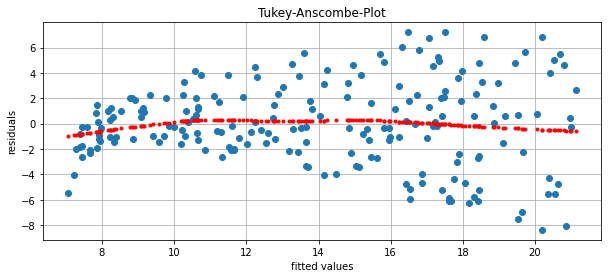

In [71]:
df = pd.read_csv("../Lecture 6/Session 06 Data/Advertising.csv")
x, y = df['TV'].values, df['sales'].values  # predictor, response
n = df.shape[0]

# compute regression coeffs
a = np.sum((x - x.mean())*(y - y.mean())/np.sum((x - x.mean())**2))
b = y.mean() - a*x.mean()

#residuals
y_hat = a*x + b
r = y - y_hat
RSE = np.sqrt(1/(n-2)*np.sum(r**2))

# Tukey-Anscombe plot
plt.figure(figsize = (10, 4))
plt.plot(y_hat, r, 'o')
res = loess_1d(y_hat, r)  # smoothing approach
plt.plot(res[0], res[1], 'r.')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title("Tukey-Anscombe-Plot")
plt.grid()
plt.show()

Non-constant variances in the errors $\epsilon_i$: **heteroscedasticity**

## Diagnostics Tool for Testing the Model Assumption

- Measure of scattering amplitude of errors: square root of the absolute value of the standardized residuals, that is $$\sqrt{|\tilde{r}_i|}$$
- Standardized residuals $\tilde{r}_i$ are defined as follows $$\tilde{r}_i = \frac{r_i}{\hat{\sigma} \sqrt{1 - \bigl( \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i=1}^n(x_i - \bar{x})^2} \bigr)}} $$
- $\hat{\sigma}$: estimate of standard deviation of error terms (estimated by RSE)
- If error terms $\epsilon_i$ are normally distributed, then $$\tilde{r}_i \sim N(0, 1)$$

## Scale-Location Plot

If we plot the square root of the absolute values of the standardized residuals versus the predicted values $\hat{y}_i$.

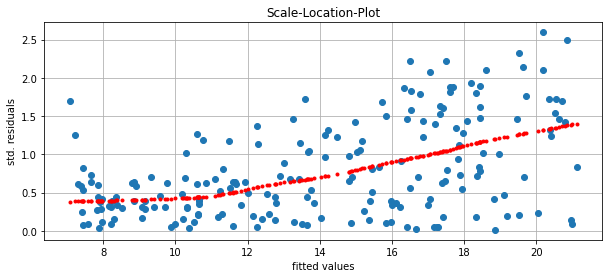

In [72]:
#scale-location plot
factor = np.sqrt(1-(1/n + (x-x.mean())**2/np.sum((x-x.mean())**2)))*RSE
std_r = r/factor
plt.figure(figsize = (10, 4))
res = loess_1d(y_hat, np.sqrt(std_r**2))
plt.plot(y_hat , np.sqrt(std_r**2), 'o')
plt.plot(res[0], res[1], 'r.')
plt.xlabel('fitted values')
plt.ylabel('std. residuals')
plt.title("Scale-Location-Plot")
plt.grid()
plt.show()

Red curve not within grey band of simulated curves: **heteroscedasticity**

## Diagnostics Tool for the Normal Distribution Assumption of the Errors ε

We are not able to determine the error terms $\epsilon_i$ directly, we use the standardized residuals instead: $\tilde{r}_i$. We check the Normal Distribution Assumption of the errors by means of a normal plot

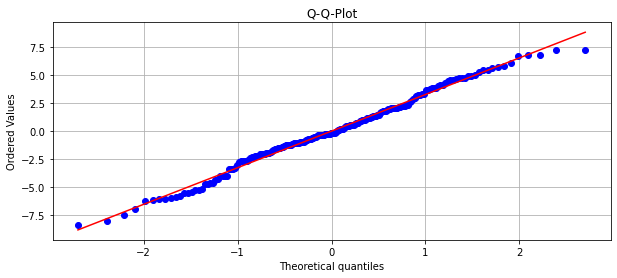

In [73]:
plt.figure(figsize = (10, 4))
stats.probplot(r, plot = plt.gca())

plt.title("Q-Q-Plot")
plt.grid()
plt.show()